In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torchvision import transforms

from utilities.dataloader import split_train_val_test, ConstructionDataset

## Task 1: Data loading

In [2]:
data_dir = 'data' 
img_dir = os.path.join(data_dir, 'foundation_images/foundation_images')

data = pd.read_csv(os.path.join(data_dir, 'stage_labels.csv'),sep=";")

# Extract camera index, timestamp, and structure index from the filename
data['camera'] = data['imagename'].apply(lambda x: x.split('_')[0])
data['timestamp'] = data['imagename'].apply(lambda x: x.split('_')[1][1:])
data['structure_index'] = data['imagename'].apply(lambda x: int(x.split('_')[2].split('.')[0]))

train_data, val_data, test_data = split_train_val_test(data_dir, data, save_as_csv=False)

In [14]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Create datasets and dataloaders
train_dataset = ConstructionDataset(train_data, img_dir, transform=transform)
val_dataset = ConstructionDataset(val_data, img_dir, transform=transform)
test_dataset = ConstructionDataset(test_data, img_dir, transform=transform)


print("Size of train, val, test set: %s, %s, %s" % (len(train_dataset), len(val_dataset), len(test_dataset)))

Size of train, val, test set: 3125, 897, 445


In [19]:
idx = 100
image, label = train_dataset[idx]
print("Image name, label: %s, %s" % (train_data["imagename"][idx], label))

Image name, label: cam1_f2023-06-13T10:30:11.766Z.jpg_9.png, Stage-2_Formwork-1


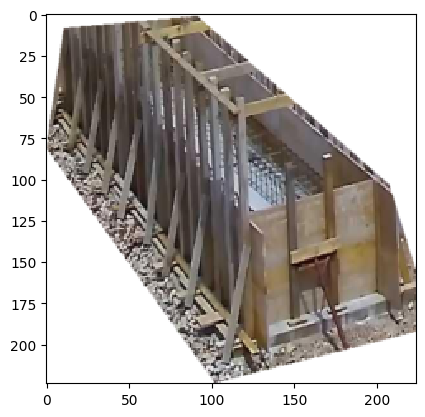

In [20]:
plt.imshow(image.permute(1, 2, 0))